In [74]:
from img_doc.dataset import PubLayNetDataset
from img_doc.document import Document

from img_doc.document import Document, Block
from img_doc.document.page.extractors.block_extractors import PageAndWordClassificator, BaseRandomWalkClassificator, BaseRandomDeepNodeClassificator

import numpy as np
import json
import random

import tensorflow as tf
import keras
from keras import layers

tf.random.set_seed(22)

import pandas as pd
from time import time
import matplotlib.pyplot as plt
import os

In [75]:
pln_ds = PubLayNetDataset(r"/home/daniil/program/dataset/publaynet/", 
                          r"/home/daniil/program/dataset/tmp_publaynet/")

In [76]:
def shuffle(x_arrays, y_arrays):
    x_vec = np.concatenate(x_arrays)
    y_vec = np.concatenate(y_arrays)
    data = [(x, y) for x, y in zip(x_vec, y_vec)]
    random.shuffle(data)
    x_vec_rnd = np.array([x for x, y in data])
    y_vec_rnd = np.array([y for x, y in data])
    return x_vec_rnd, y_vec_rnd
    

def get_data(dataset, balans=True): #, batch_size=128

    X = np.array(dataset["x"])
    y = np.array(dataset["y"])
    
    keys = np.unique(y)
    Y_keys = dict()
    for i, key in enumerate(keys):
        z = np.zeros(5)
        z[i] = 1
        Y_keys[key] = z
    Y = np.array([Y_keys[yi] for yi in y])

    X_clus_list = []
    Y_clus_list = []

    for i, item in enumerate(Y_keys.keys()):
        X_clus_list.append(X[Y[:,i]==1,:])
        Y_clus_list.append(Y[Y[:,i]==1,:])
        
    if balans:
        balans_len = [len(yc) for yc in Y_clus_list]
        min_len = min(balans_len)
    
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    val_x = []
    val_y = []
    for class_data in zip(X_clus_list, Y_clus_list):
        data = [(x, y) for x, y in zip(class_data[0], class_data[1])]
        random.shuffle(data)
        if balans:
            data = data[:min_len]
        len_data = len(data)
        len_test = round(0.2*len_data)
        len_val = round((len_data-len_test)*0.2)
        len_train = len_data - len_test - len_val
        
        train_x.append([x for x, y in data[:len_train]])
        train_y.append([y for x, y in data[:len_train]])
        
        val_x.append([x for x, y in data[len_train:len_train+len_val]])
        val_y.append([y for x, y in data[len_train:len_train+len_val]])
    
        test_x.append([x for x, y in data[-len_test:]])
        test_y.append([y for x, y in data[-len_test:]])
        
    train_x, train_y = shuffle(train_x, train_y)
    val_x, val_y = shuffle(val_x, val_y)
    test_x, test_y = shuffle(test_x, test_y)
    
    return train_x, train_y, val_x, val_y, test_x, test_y, Y_keys

def save_dataset(pwc, name, set_):
    def fun_from_tmp_and_path_image(tmp_json, img_path):
        doc = Document()
        doc.set_from_path(img_path)
        doc.pages[0].set_blocks_from_dict(tmp_json["blocks"])
        doc.pages[0].set_words_from_dict(tmp_json["additional_info"]["words"])
        if "bold" in set_:
            doc.pages[0].extract_word_bold()
        for word in doc.pages[0].words:
            for block in doc.pages[0].blocks:
                if block.segment.is_intersection(word.segment):
                    block.words.append(word)
        x = []
        y = []
        for page in doc.pages:
            try:
                x =pwc.get_block_and_page_vecs(page)
                for block in page.blocks:
                    y.append(block.label)
            except:
                print(doc.path)
        return {"x": [xi.tolist() for xi in x], "y": y}
    
    pln_ds.create_json_from_tmps_and_images(fun_from_tmp_and_path_image, 
                                                path_dir_jsons="dataset_tmp", 
                                                count_train_files=100,  
                                                balans = True)


In [4]:
brwc = BaseRandomWalkClassificator(conf={"properties": ["many_dist", "many_angle", "place_in_block", "height", "bold"],
                                         "count_step":100})
brdc = BaseRandomDeepNodeClassificator({"properties":["many_dist", "many_angle", "place_in_block", "height", "bold"],
                                        "count_node":1, 
                                        "deep":3 })
pwc = PageAndWordClassificator(brdc, conf={"properties":["place_in_page", "count_word_in_page"]})

save_dataset(pwc, name="dataset_3.json", set_=["bold"])

train:
/home/daniil/program/dataset/publaynet/train/PMC3505796_00004.jpg
/home/daniil/program/dataset/publaynet/train/PMC5329893_00002.jpg


/home/daniil/program/python/project/layout_highlighter/imgDoc/env/lib/python3.10/site-packages/img_doc/document/page/extractors/word_extractors/bold_extractors/sph_bold_extractor.py:46: RuntimeWarning: Mean of empty slice.
  mean_ = img_word.mean(1)
/home/daniil/program/python/project/layout_highlighter/imgDoc/env/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


/home/daniil/program/dataset/publaynet/train/PMC5919984_00000.jpg
/home/daniil/program/dataset/publaynet/train/PMC5800348_00000.jpg
/home/daniil/program/dataset/publaynet/train/PMC5397437_00004.jpg
/home/daniil/program/dataset/publaynet/train/PMC4782684_00238.jpg
/home/daniil/program/dataset/publaynet/train/PMC6087436_00004.jpg
/home/daniil/program/dataset/publaynet/train/PMC4233714_00005.jpg
/home/daniil/program/dataset/publaynet/train/PMC4781946_00002.jpg
/home/daniil/program/dataset/publaynet/train/PMC3644173_00007.jpg
/home/daniil/program/dataset/publaynet/train/PMC5004597_00008.jpg
/home/daniil/program/dataset/publaynet/train/PMC3993045_00000.jpg
/home/daniil/program/dataset/publaynet/train/PMC5029444_00005.jpg
/home/daniil/program/dataset/publaynet/train/PMC4867865_00005.jpg
/home/daniil/program/dataset/publaynet/train/PMC6055857_00003.jpg
/home/daniil/program/dataset/publaynet/train/PMC5773900_00006.jpg
/home/daniil/program/dataset/publaynet/train/PMC5703426_00026.jpg
/home/dani

In [77]:
def dataset_from_jsons(procent = 0.1):
    list_labek_block_in_file = []
    base_name_file = os.path.join("dataset_tmp", "train_") 
    for i in range(99):
        y = []
        with open(f"{base_name_file}{i}.json", "r") as f:
            rez = json.load(f)
            for doc in rez["train"]:
                y.append(doc["y"])
            list_labek_block_in_file.append(y)
    count_class = {0: 0, 1:0, 2: 0, 3: 0, 4: 0}


    for file in list_labek_block_in_file:
        for doc in file:
            for block in doc:
                count_class[block] += 1
    
    count_procent_class = dict()
    for key, item in count_class.items():
        count_procent_class[key] = round(procent * item)
    print(count_procent_class)
    
    cordinate = dict()
    for i in range(99):
        cordinate[i] = dict()
    
    count_class_finding = {0: 0, 1:0, 2: 0, 3: 0, 4: 0}
    for i, file in enumerate(list_labek_block_in_file):
        for j, doc in enumerate(file):
            for k, block in enumerate(doc):
                if count_class_finding[block] < count_procent_class[block]:
                    count_class_finding[block] += 1
                    if j in cordinate[i].keys():
                        cordinate[i][j].append(k)
                    else:
                        cordinate[i][j] = [k]
    dataset = {"x": [], "y": []}
    
    
    for key, cord in cordinate.items():
        x = []
        base_name_file = os.path.join("dataset_tmp", "train_") 
        with open(f"{base_name_file}{key}.json", "r") as f:
            rez = json.load(f)
            for doc_i, list_block in cord.items():
                for k in list_block:
                    dataset["y"].append(rez["train"][doc_i]["y"][k])
                    x = rez["train"][doc_i]["x"][k]
                    x = np.concatenate([x[:252], x[-3:]])
                    dataset["x"].append(x)
    
    return dataset

In [78]:
name = "dataset_2.json"
dataset = dataset_from_jsons(procent=1.0)

train_x, train_y, val_x, val_y, test_x, test_y, Y_keys = get_data(dataset, balans=True)

with open(name, "w") as f:
    json.dump({"train_x": train_x.tolist(), "train_y": train_y.tolist(),
               "val_x": val_x.tolist(), "val_y": val_y.tolist(), 
               "test_x": test_x.tolist(), "test_y": test_y.tolist()}, f)
    
del train_x, train_y, val_x, val_y, test_x, test_y, Y_keys, dataset

{0: 6700, 1: 6558, 2: 6650, 3: 6640, 4: 6753}


In [79]:
name_model = "RDMDMAPHB-PLN"
with open("dataset_2.json", "r") as f:
    dataset = json.load(f)

In [80]:
print("Первый x:\n", dataset["train_x"][0])
print("Последний, x:\n", dataset["train_x"][-1])
x_len = len(dataset["train_x"][0])
print("Размер x:\t", x_len)
print("Первый y:\t", dataset["train_y"][0])
print("Последний y:\t", dataset["train_y"][0])
print("Кол-во записей:\t", len(dataset["train_x"]))

Первый x:
 [1.0, 0.16883800336329358, 0.3125, 1.0, 0.0, 1.0, 0.0, 0.9977851578566089, 0.40191387559808617, 0.05, 0.5384615384615385, 0.5612244897959183, 1.0, 1.0, 0.3125, 1.0, 0.0, 1.0, 0.0, 0.9977851578566089, 0.3800904977375566, 0.07407407407407407, 0.5384615384615385, 0.22959183673469388, 1.0, 0.34668762264076824, 0.3125, 0.7142857142857143, 0.0, 1.0, 0.0, 0.9977851578566089, 0.37168141592920356, 0.14285714285714285, 0.5384615384615385, 0.5298273155416013, 1.0, 0.34668762264076824, 0.3125, 0.7142857142857143, 0.0, 1.0, 0.0, 0.9977851578566089, 0.37168141592920356, 0.14285714285714285, 0.5384615384615385, 0.5298273155416013, 0.6850902561004873, 0.2773500981126146, 0.07407407407407407, 0.7142857142857143, 0.0, 0.9987607880813234, 1.0, 1.0, 0.5309734513274337, 0.14285714285714285, 0.5384615384615385, 0.7845036319612592, 1.0, 0.25555062599997597, 0.681183002412971, 1.0, 0.0, 1.0, 1.0, 0.9993148337667671, 0.37500000000000006, 0.35000000000000003, 0.5384615384615385, 0.7614667940754897, 1

In [81]:
mega_hist = []

In [82]:
train_x, train_y, val_x, val_y, test_x, test_y, = dataset["train_x"], dataset["train_y"], dataset["val_x"], dataset["val_y"], dataset["test_x"] , dataset["test_y"]
# train_x = np.array([np.concatenate([x[:300] ]+[ x[-3:]]) for x in train_x])
# val_x =  np.array([np.concatenate([x[:300] ]+[ x[-3:]]) for x in val_x])
# test_x = np.array([np.concatenate([x[:300] ]+[ x[-3:]]) for x in test_x])
# val_y = np.array(val_y)
# train_y = np.array(train_y)
# test_y = np.array(test_y)
#batch 75 (ac:65) node 40 в конце лучше не ставить большой dropout, а перед 0.2

# for arg in args:
hist = []
model = keras.Sequential()

input_len = len(train_x[0])
output_len = 5

list_layer = [(63, 0.2)] # len, dropout
epochs = 20
batch_size = 1000 # 75

model.add(layers.Dense(units=input_len, activation='relu'))
for lay in list_layer:
    model.add(layers.Dropout(rate=lay[1], seed=22))
    model.add(layers.Dense(units=lay[0],  activation='relu'))
model.add(layers.Dense(units=output_len, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

  
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))
hist.append(history)

loss_and_metrics = model.evaluate(test_x, test_y, batch_size=epochs)
loss_and_metrics
mega_hist.append({"hist": hist, "loss_and_metrics": loss_and_metrics, 
                 "list_layer": list_layer, "epochs": epochs, "batch_size": batch_size })

Epoch 1/20
21/21 [==============================] - 4s 181ms/step - loss: 1.3909 - accuracy: 0.3789 - val_loss: 1.1886 - val_accuracy: 0.4845
Epoch 2/20
21/21 [==============================] - 0s 8ms/step - loss: 1.1461 - accuracy: 0.4995 - val_loss: 1.0602 - val_accuracy: 0.5510
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 1.0440 - accuracy: 0.5478 - val_loss: 0.9852 - val_accuracy: 0.5859
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.9763 - accuracy: 0.5793 - val_loss: 0.9283 - val_accuracy: 0.6194
Epoch 5/20
21/21 [==============================] - 0s 8ms/step - loss: 0.9275 - accuracy: 0.6005 - val_loss: 0.8863 - val_accuracy: 0.6351
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.8896 - accuracy: 0.6171 - val_loss: 0.8605 - val_accuracy: 0.6465
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.8599 - accuracy: 0.6310 - val_loss: 0.8485 - val_accuracy: 0.6568
Epoch 8/20
21/21 [

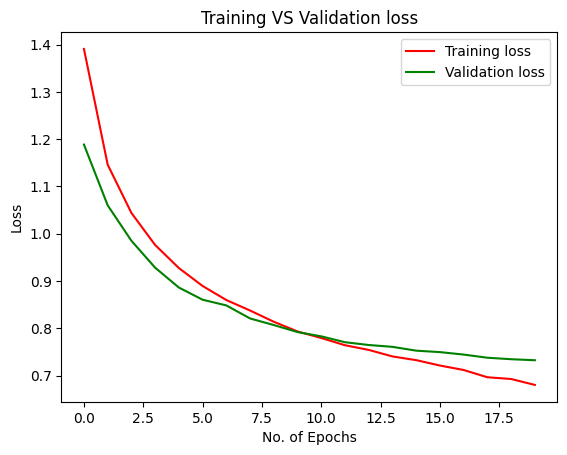

In [83]:
plt.plot(np.concatenate([h.history['loss'] for h in hist]), 'r', label='Training loss')
plt.plot(np.concatenate([h.history['val_loss'] for h in hist]), 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

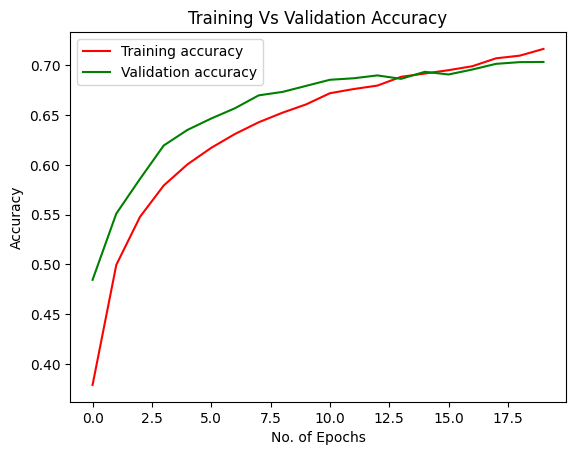

In [84]:
plt.plot(np.concatenate([h.history['accuracy'] for h in hist]), 'r', label='Training accuracy')
plt.plot(np.concatenate([h.history['val_accuracy'] for h in hist]), 'g', label='Validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

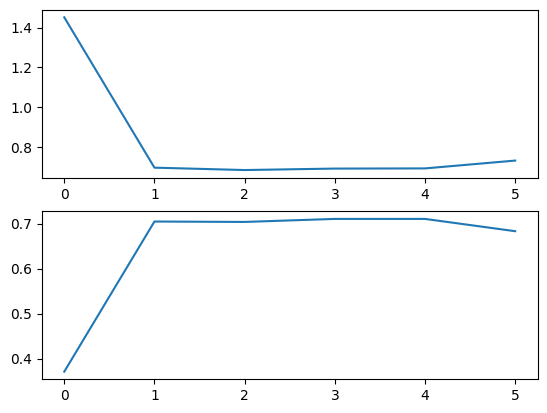

In [54]:
count_node = [0, 1, 2, 3, 4, 5]
loss = [m["loss_and_metrics"][0] for m in mega_hist[-6:]]
ac  = [m["loss_and_metrics"][1] for m in mega_hist[-6:]]
plt.subplot(2, 1, 1)
plt.plot(count_node, loss)
plt.subplot(2, 1, 2)
plt.plot(count_node, ac)


In [49]:
mega_hist[-1]

{'hist': [<keras.src.callbacks.History at 0x7f4986446440>],
 'loss_and_metrics': [0.7323734164237976, 0.6830792427062988],
 'list_layer': [(63, 0.2)],
 'epochs': 20,
 'batch_size': 1000}

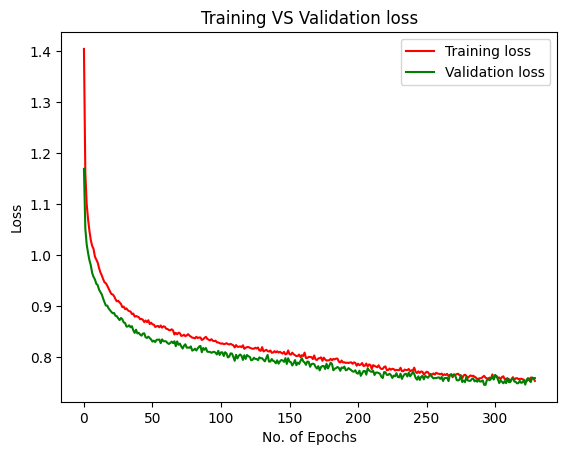

In [51]:
plt.plot(np.concatenate([h.history['loss'] for h in mega_hist[-1]["hist"]]), 'r', label='Training loss')
plt.plot(np.concatenate([h.history['val_loss'] for h in  mega_hist[-1]["hist"]]), 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

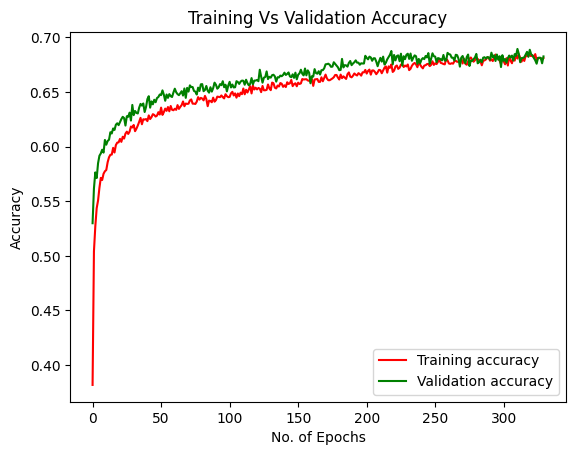

In [52]:
plt.plot(np.concatenate([h.history['accuracy'] for h in mega_hist[-1]["hist"]]), 'r', label='Training accuracy')
plt.plot(np.concatenate([h.history['val_accuracy'] for h in mega_hist[-1]["hist"]]), 'g', label='Validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
class ExportModule(tf.Module):
  def __init__(self, model, preprocess, class_pred):
    # Initialize pre and postprocessing functions
    self.model = model
    self.preprocess = preprocess
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, input_len], dtype=tf.float32)]) 
  def __call__(self, x):
    # Run the ExportModule for new data points
    x = self.preprocess(x)
    y = self.model(x)
    print(y)
    y = self.class_pred(y)
    return y

def preprocess_test(x):
  return x

def class_pred_test(y):
  # Generate class predictions from MLP output
  return y

In [86]:
mlp_model_export = ExportModule(model=model,
                                preprocess=preprocess_test,
                                class_pred=class_pred_test)

In [87]:
save_path = name_model
tf.saved_model.save(mlp_model_export, save_path)
mlp_loaded = tf.saved_model.load(save_path)

Tensor("sequential_20/dense_68/Softmax:0", shape=(None, 5), dtype=float32)
INFO:tensorflow:Assets written to: RDMDMAPHB-PLN/assets


INFO:tensorflow:Assets written to: RDMDMAPHB-PLN/assets


In [88]:
def accuracy_score(y_pred, y):
  # Generic accuracy function
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

test_classes = mlp_loaded(test_x)
test_acc = accuracy_score([np.argmax(y) for y in test_classes], [np.argmax(y) for y in test_y])
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.702


'myfile'